In [2]:
import os
from PIL import Image
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import sys
import random
import matplotlib.pyplot as plt
import torch

In [3]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../models/CNN')))
from cnn import MultiLabelCNN

In [4]:
data_path = os.path.join('..', '..', 'data', 'external', 'double_mnist')

In [5]:
import os
import numpy as np
from PIL import Image

def load_mnist_data(base_path):
    # Initialize lists for training, validation, and test datasets
    train_images, train_labels = [], []
    val_images, val_labels = [], []
    test_images, test_labels = [], []

    # Iterate through the train, val, and test folders
    for split in ['train', 'val', 'test']:
        split_path = os.path.join(base_path, split)
        for label_folder in os.listdir(split_path):
            folder_path = os.path.join(split_path, label_folder)
            if os.path.isdir(folder_path):
                for img_name in os.listdir(folder_path):
                    img_path = os.path.join(folder_path, img_name)
                    image = Image.open(img_path).convert('L')  # Convert to grayscale
                    image_array = np.array(image)  # Convert image to numpy array
                    
                    # One-hot encoded label
                    one_hot_label = [0] * 10  # Initialize with zeros for digits 0-9
                    if label_folder == '0':
                        one_hot_label = [0] * 10  # No digits present
                    else:
                        for digit in label_folder:
                            one_hot_label[int(digit)] = 1  # Set corresponding indices to 1
                    
                    # Append images and labels to the respective lists based on the split
                    if split == 'train':
                        train_images.append(image)
                        train_labels.append(one_hot_label)
                    elif split == 'val':
                        val_images.append(image)
                        val_labels.append(one_hot_label)
                    elif split == 'test':
                        test_images.append(image)
                        test_labels.append(one_hot_label)

    # Return separate tuples for train, validation, and test data
    return (train_images, train_labels), (val_images, val_labels), (test_images, test_labels)

# Example usage
 # Change this to your actual path
train_data, val_data, test_data = load_mnist_data(data_path)

# Access images and labels
train_images, train_labels = train_data
val_images, val_labels = val_data
test_images, test_labels = test_data

# Check the number of samples loaded
print(f"Number of training images loaded: {len(train_images)}")
print(f"Number of validation images loaded: {len(val_images)}")
print(f"Number of testing images loaded: {len(test_images)}")

Number of training images loaded: 12600
Number of validation images loaded: 3000
Number of testing images loaded: 4600


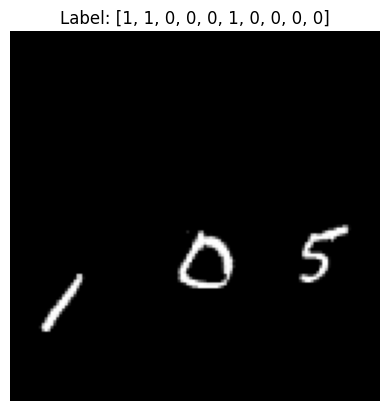

Sample label (one-hot encoded): [1, 1, 0, 0, 0, 1, 0, 0, 0, 0]


In [6]:
sample_index = 1541  # Change this to the desired index

# Retrieve the image and label
sample_image = train_images[sample_index]
sample_label = train_labels[sample_index]

# Display the image
plt.imshow(sample_image, cmap='gray')  # Use 'gray' for grayscale images
plt.title(f"Label: {sample_label}")
plt.axis('off')  # Hide the axis
plt.show()

# Print the label for confirmation
print("Sample label (one-hot encoded):", sample_label)

seems that the preprocessing is working fine 

In [7]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

class MultiMNISTDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images  # Assuming images is a list of file paths or PIL images
        self.labels = labels  # Assuming labels is a list of lists or arrays
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index]
        label = self.labels[index]  # Assuming this is a list

        # If images are file paths, convert them to PIL images
        if isinstance(image, str):
            image = Image.open(image)

        # Apply transformations if any
        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float)

# Define any transformations if needed
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Ensure images are resized correctly
    transforms.ToTensor(),            # Convert PIL image to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the tensor
])

# Create dataset instances
train_dataset = MultiMNISTDataset(train_data[0], train_data[1], transform=transform)
val_dataset = MultiMNISTDataset(val_data[0], val_data[1], transform=transform)
test_dataset = MultiMNISTDataset(test_data[0], test_data[1], transform=transform)

# Create data loaders for training and evaluation
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Example of how to iterate over the train loader
for batch_index, (images, labels) in enumerate(train_loader):
    print(f"Batch index: {batch_index}")
    print(f"Images batch shape: {images.shape}")  # Shape of the images batch
    print(f"Labels batch shape: {labels.shape}")  # Shape of the labels batch
    # Print the first label in this batch
    print(f"First label in this batch: {labels[0].numpy()} (Length: {labels[0].shape})")

Batch index: 0
Images batch shape: torch.Size([32, 1, 128, 128])
Labels batch shape: torch.Size([32, 10])
First label in this batch: [0. 0. 0. 0. 1. 0. 1. 0. 0. 1.] (Length: torch.Size([10]))
Batch index: 1
Images batch shape: torch.Size([32, 1, 128, 128])
Labels batch shape: torch.Size([32, 10])
First label in this batch: [1. 0. 0. 1. 0. 0. 0. 0. 0. 1.] (Length: torch.Size([10]))
Batch index: 2
Images batch shape: torch.Size([32, 1, 128, 128])
Labels batch shape: torch.Size([32, 10])
First label in this batch: [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.] (Length: torch.Size([10]))
Batch index: 3
Images batch shape: torch.Size([32, 1, 128, 128])
Labels batch shape: torch.Size([32, 10])
First label in this batch: [0. 0. 0. 0. 0. 1. 0. 0. 1. 1.] (Length: torch.Size([10]))
Batch index: 4
Images batch shape: torch.Size([32, 1, 128, 128])
Labels batch shape: torch.Size([32, 10])
First label in this batch: [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.] (Length: torch.Size([10]))
Batch index: 5
Images batch shape: torch

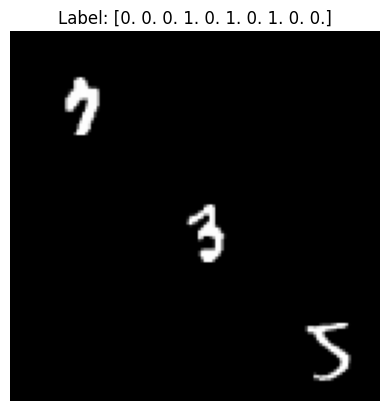

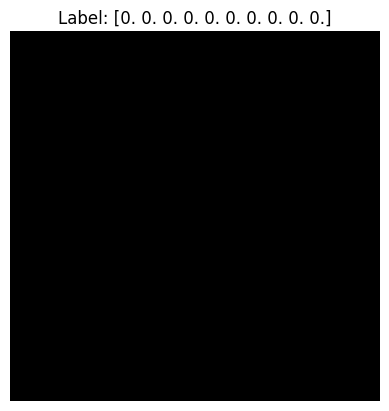

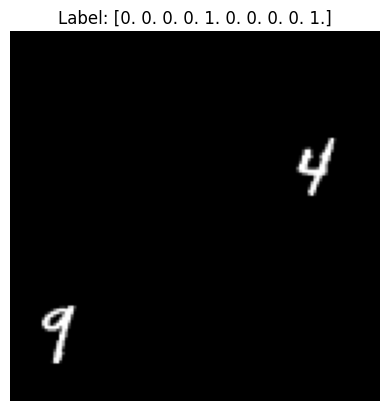

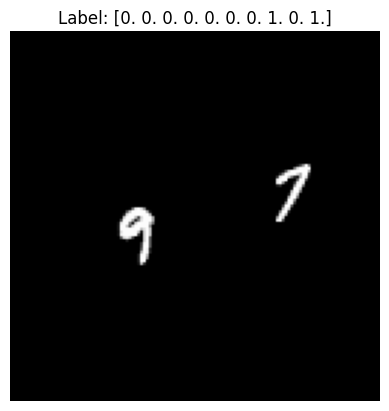

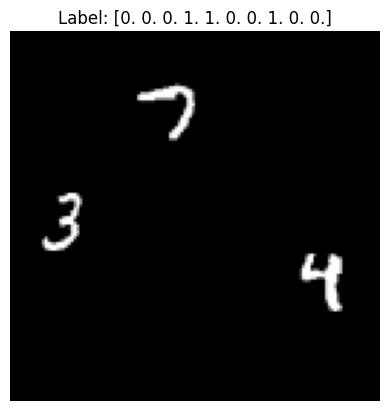

In [8]:
import matplotlib.pyplot as plt

# Function to display an image with its label
def display_image_and_label(image, label):
    # Remove the normalization if needed (undo normalization)
    image = image * 0.5 + 0.5  # Assuming Normalize((0.5,), (0.5,))
    np_image = image.squeeze().numpy()  # Convert tensor to numpy array and squeeze extra dimension
    
    plt.imshow(np_image, cmap='gray')  # Display in grayscale
    plt.title(f"Label: {label.numpy()}")
    plt.axis('off')
    plt.show()

# Get one batch of images and labels from the loader
images, labels = next(iter(train_loader))

# Display a few images and their labels
for i in range(5):  # Display first 5 images in the batch
    display_image_and_label(images[i], labels[i])

working perfectly after passing through the data loader , so now i can move on

we need the last layer to be a sigmoid instead of a soft max , since soft max will predict only one output (maxed probability) while sigmoid will weigh the probabilities of each class independently and output a 1 (true) if the value is higher than half, so sigmoid is suitable for multi label cnnn

In [9]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import hamming_loss


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model and move it to the correct device
model = MultiLabelCNN(num_classes=10, dropout_rate=0.5).to(device)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for multi-label classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Default learning rate

# Training loop
def exact_match_accuracy(preds, labels):
    preds = (preds > 0.5).float()  # Convert probabilities to binary values
    correct = (preds == labels).all(dim=1).float()  # Check exact match
    return correct.mean().item()

# Function to calculate Hamming accuracy
def hamming_accuracy(preds, labels):
    preds = (preds > 0.5).float()  # Convert probabilities to binary values
    return 1 - hamming_loss(labels.cpu().numpy(), preds.cpu().numpy())


def train_model(model, train_loader, val_loader, test_loader, epochs=10):
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()

        train_loss /= len(train_loader)

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        
        val_loss /= len(val_loader)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Testing phase
    test_exact_match_acc = 0.0
    test_hamming_acc = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            test_exact_match_acc += exact_match_accuracy(outputs, labels)
            test_hamming_acc += hamming_accuracy(outputs, labels)

    test_exact_match_acc /= len(test_loader)
    test_hamming_acc /= len(test_loader)

    print(f"Test Exact Match Accuracy: {test_exact_match_acc:.4f}")
    print(f"Test Hamming Accuracy: {test_hamming_acc:.4f}")

# Run the training
train_model(model, train_loader, val_loader, test_loader, epochs=10)

Epoch 1/10, Train Loss: 0.4702, Val Loss: 0.4561
Epoch 2/10, Train Loss: 0.4163, Val Loss: 0.3818
Epoch 3/10, Train Loss: 0.3275, Val Loss: 0.3403
Epoch 4/10, Train Loss: 0.2625, Val Loss: 0.3051
Epoch 5/10, Train Loss: 0.2176, Val Loss: 0.2931
Epoch 6/10, Train Loss: 0.1860, Val Loss: 0.2787
Epoch 7/10, Train Loss: 0.1596, Val Loss: 0.2818
Epoch 8/10, Train Loss: 0.1406, Val Loss: 0.2669
Epoch 9/10, Train Loss: 0.1228, Val Loss: 0.2956
Epoch 10/10, Train Loss: 0.1067, Val Loss: 0.2819
Test Exact Match Accuracy: 0.3044
Test Hamming Accuracy: 0.8979


In [1]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")

CUDA available: True
Number of GPUs: 1
GPU Name: NVIDIA GeForce RTX 3050 Ti Laptop GPU


In [22]:
import random

# Define hyperparameter options
learning_rates = [0.001, 0.0001]
optimizers = ['adam', 'sgd']
dropout_rates = [0.7, 0.3, 0.5]

# Generate all possible combinations
all_combinations = []
for lr in learning_rates:
    for optimizer in optimizers:
        for dropout in dropout_rates:
            all_combinations.append((lr, optimizer, dropout))

# Randomly select 5 unique combinations
random_combinations = random.sample(all_combinations, 5)

print("Random Hyperparameter Combinations (Disjoint):")
for combination in random_combinations:
    print(f"Learning Rate={combination[0]}, Optimizer={combination[1]}, Dropout={combination[2]}")

Random Hyperparameter Combinations (Disjoint):
Learning Rate=0.0001, Optimizer=adam, Dropout=0.3
Learning Rate=0.001, Optimizer=sgd, Dropout=0.7
Learning Rate=0.001, Optimizer=adam, Dropout=0.5
Learning Rate=0.0001, Optimizer=sgd, Dropout=0.3
Learning Rate=0.0001, Optimizer=sgd, Dropout=0.5


Running combination 1: Learning Rate=0.0001, Optimizer=adam, Dropout=0.3
Running combination 2: Learning Rate=0.001, Optimizer=sgd, Dropout=0.7
Running combination 3: Learning Rate=0.001, Optimizer=adam, Dropout=0.5
Running combination 4: Learning Rate=0.0001, Optimizer=sgd, Dropout=0.3
Running combination 5: Learning Rate=0.0001, Optimizer=sgd, Dropout=0.5


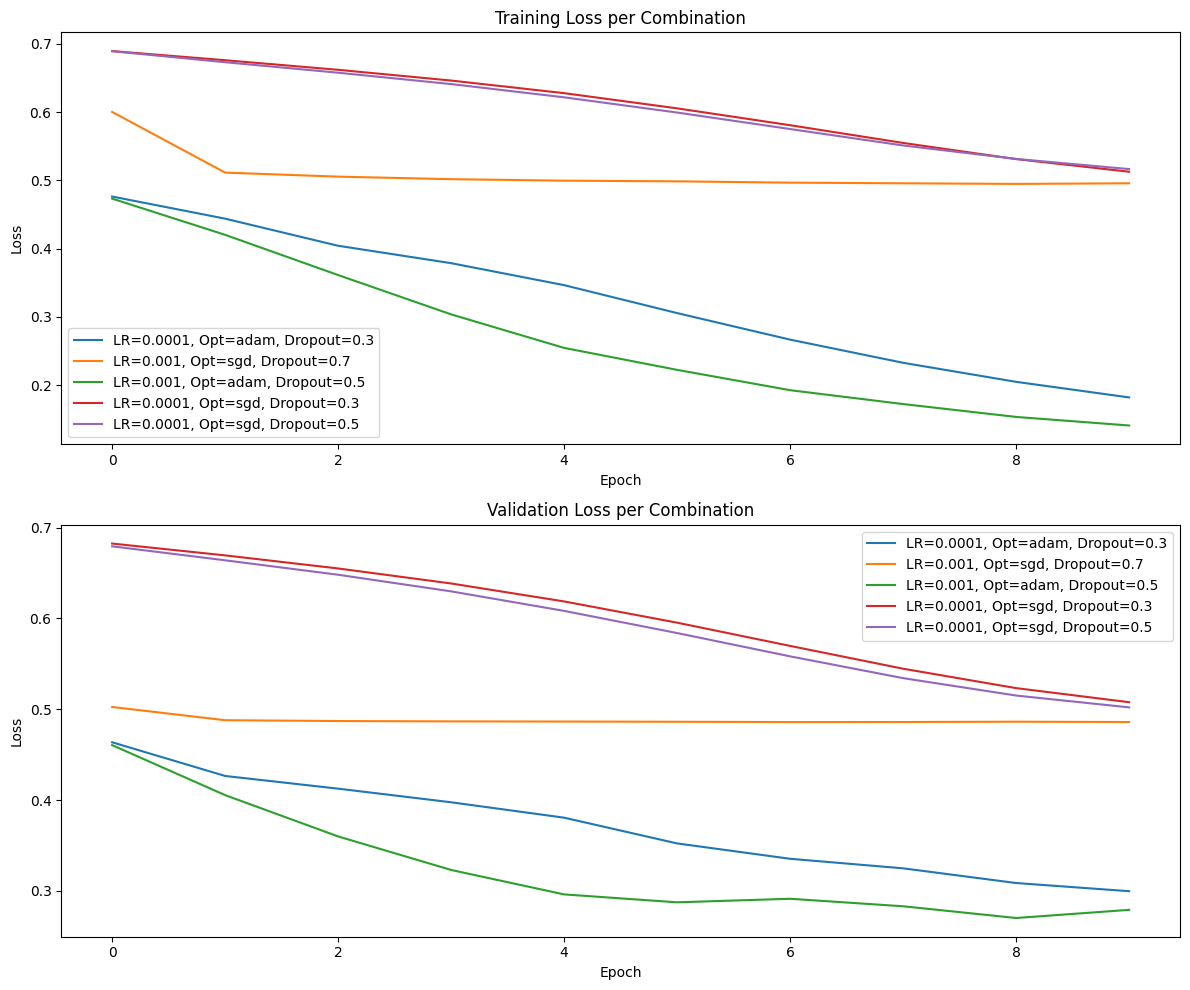

In [23]:
import matplotlib.pyplot as plt
from torch import optim

# Define a function to select the optimizer based on the string name
def get_optimizer(optimizer_name, model, lr):
    if optimizer_name == 'adam':
        return optim.Adam(model.parameters(), lr=lr)
    elif optimizer_name == 'sgd':
        return optim.SGD(model.parameters(), lr=lr)
    elif optimizer_name == 'rmsprop':
        return optim.RMSprop(model.parameters(), lr=lr)
    else:
        raise ValueError(f"Unknown optimizer: {optimizer_name}")

# Dictionary to store training results for each combination
results = {}

# Run and evaluate each combination
for i, (lr, optimizer_name, dropout) in enumerate(random_combinations):
    print(f"Running combination {i+1}: Learning Rate={lr}, Optimizer={optimizer_name}, Dropout={dropout}")

    # Initialize model with current dropout rate
    model = MultiLabelCNN(dropout_rate=dropout).to(device)
    
    # Get optimizer
    optimizer = get_optimizer(optimizer_name, model, lr)
    criterion = nn.BCELoss()

    # Lists to store losses for each epoch
    train_losses, val_losses = [], []
    
    # Training loop
    for epoch in range(10):  # Adjust epochs as needed
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Calculate average training loss for this epoch
        train_losses.append(train_loss / len(train_loader))

        # Validation loop
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        # Calculate average validation loss for this epoch
        val_losses.append(val_loss / len(val_loader))
    
    # Store the results
    results[(lr, optimizer_name, dropout)] = {
        "train_losses": train_losses,
        "val_losses": val_losses
    }

# Plotting the results
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot train and validation losses for each combination
for (lr, optimizer_name, dropout), result in results.items():
    ax[0].plot(result["train_losses"], label=f"LR={lr}, Opt={optimizer_name}, Dropout={dropout}")
    ax[1].plot(result["val_losses"], label=f"LR={lr}, Opt={optimizer_name}, Dropout={dropout}")

ax[0].set_title("Training Loss per Combination")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].set_title("Validation Loss per Combination")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")
ax[1].legend()

plt.tight_layout()
plt.show()

the best hyper parameters seem to be lr = 0.001 , optimiser = adam and drop out rate = 0.5

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model and move it to the correct device
model = MultiLabelCNN(num_classes=10, dropout_rate=0.5).to(device)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for multi-label classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Best learning rate


def train_model(model, train_loader, val_loader, test_loader, epochs=10):
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_exact_match_acc = 0.0
        train_hamming_acc = 0.0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            train_exact_match_acc += exact_match_accuracy(outputs, labels)
            train_hamming_acc += hamming_accuracy(outputs, labels)
        
        train_loss /= len(train_loader)
        train_exact_match_acc /= len(train_loader)
        train_hamming_acc /= len(train_loader)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_exact_match_acc = 0.0
        val_hamming_acc = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item()
                val_exact_match_acc += exact_match_accuracy(outputs, labels)
                val_hamming_acc += hamming_accuracy(outputs, labels)
        
        val_loss /= len(val_loader)
        val_exact_match_acc /= len(val_loader)
        val_hamming_acc /= len(val_loader)
        
        print(f"Epoch {epoch+1}/{epochs}, "
              f"Train Loss: {train_loss:.4f}, Train Exact Match Acc: {train_exact_match_acc:.4f}, Train Hamming Acc: {train_hamming_acc:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Exact Match Acc: {val_exact_match_acc:.4f}, Val Hamming Acc: {val_hamming_acc:.4f}")

    # Testing phase
    test_exact_match_acc = 0.0
    test_hamming_acc = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            test_exact_match_acc += exact_match_accuracy(outputs, labels)
            test_hamming_acc += hamming_accuracy(outputs, labels)

    test_exact_match_acc /= len(test_loader)
    test_hamming_acc /= len(test_loader)

    print(f"Test Exact Match Accuracy: {test_exact_match_acc:.4f}")
    print(f"Test Hamming Accuracy: {test_hamming_acc:.4f}")

# Run the training
train_model(model, train_loader, val_loader, test_loader, epochs=10)

Epoch 1/10, Train Loss: 0.4698, Train Exact Match Acc: 0.0394, Train Hamming Acc: 0.8134, Val Loss: 0.4335, Val Exact Match Acc: 0.0396, Val Hamming Acc: 0.8169
Epoch 2/10, Train Loss: 0.3789, Train Exact Match Acc: 0.1109, Train Hamming Acc: 0.8328, Val Loss: 0.3444, Val Exact Match Acc: 0.1515, Val Hamming Acc: 0.8429
Epoch 3/10, Train Loss: 0.2896, Train Exact Match Acc: 0.2708, Train Hamming Acc: 0.8732, Val Loss: 0.3128, Val Exact Match Acc: 0.2123, Val Hamming Acc: 0.8611
Epoch 4/10, Train Loss: 0.2372, Train Exact Match Acc: 0.3757, Train Hamming Acc: 0.8978, Val Loss: 0.2805, Val Exact Match Acc: 0.2796, Val Hamming Acc: 0.8800
Epoch 5/10, Train Loss: 0.1896, Train Exact Match Acc: 0.4856, Train Hamming Acc: 0.9202, Val Loss: 0.2630, Val Exact Match Acc: 0.3037, Val Hamming Acc: 0.8934
Epoch 6/10, Train Loss: 0.1602, Train Exact Match Acc: 0.5499, Train Hamming Acc: 0.9328, Val Loss: 0.2624, Val Exact Match Acc: 0.3422, Val Hamming Acc: 0.8983
Epoch 7/10, Train Loss: 0.1356, Tr

nearly 40% exact match accuracy on test set and 91% on hamming accuracy.
